In [24]:
from collections import Counter,defaultdict
from bs4 import BeautifulSoup as bs
from bs4 import Comment
import os
import glob
import nltk
import math
import urllib2
import time
import progressbar
from __future__ import division

In [179]:
path_to_folder = 'C:\\Users\\Isobel\\Documents\\auc\\textmining\\erowid_text'
filenames = os.listdir(path_to_folder)

test_files = filenames[:5000]


In [180]:
#because of the fact that we downloaded the data to file, decided to make smaller dict 
# ref is the experience number (and therefore file name)
# {ref {drug: gender}}

def retrieve_drug_and_gender(folder):
    """
    takes a folder and opens the files inside
    then finds the foottable and extracts the gender
    then finds the beginning table and extracts the drug   
    """
    drug_dict = {}
    #put this back os.listdir
    for f in (folder):
        drug_dict[f] = {}
        open_file = open(path_to_folder + '//' + f, 'r')
        bs_f = bs(open_file, "lxml")
        #find the html table with the class footdata
        # write a check for the table
        if (bs_f.find(class_='footdata')):
            #print "yes"
            end_table = bs_f.find(class_='footdata')
            rows = end_table.findAll('tr')
            #print rows
            #the gender is listed in the table data text as the 3rd element in the table
            gender_in_table = [[td.text for td in tr.findAll("td")] for tr in rows]
            g = gender_in_table[1]
            #clumsy function that takes the 0th element of the list from g  and partitions it to return the
            #second substring
            gender = g[0].partition(':')[2]
            #get the table containing the drug information
            drug_class = [td.find('a') for td in bs_f.findAll('td', {'class' : 'dosechart-substance'})]
            #take a set of the list to remove duplicate entries
            drug = set([drug.text for drug in drug_class if drug])
            #convert to string to use in dict
            # naiave way to remove unwanted characters from string
            drug = str(drug).strip("set([")
            drug = str(drug).strip("])")
            drug_dict[f][drug] = gender
        else:
            pass
    return drug_dict

#a list of genders and the drugs
#data_set = retrieve_drug_and_gender(absolute_urls)

test_dict =  retrieve_drug_and_gender(test_files)

In [182]:
def count_gender(drug_gender_dict):
    """
    takes output of retrieve_drug_and_gender and 
    returns a dict of theccount of each gender for each drug
    """
    male_dict = {}
    female_dict = {}
    #select the second list in the item -> this is the part 
    #containing the information about gender
    for i in drug_gender_dict.values():
        for gender in i.values():
            #if gender is male, male_count is + 1
            if "Male" in gender:
                # we need to add 1 to the count specific to that drug
                #use a set to ensure no repetition of drug name in table
                for drug in i.keys():
                    if not drug in male_dict:
                        #if the drug is not already a key in the dict, then the count is 1
                        # as we havent seen it before
                        male_dict[drug] = 1
                    else:
                        # the count is incremented by 1
                        male_dict[drug] += 1
            #add 1 to female count if the gender is female
            if "Female" in gender:
                #check that there is no repetition of the same drug in a single entry
                for drug in i.keys():
                    if not drug in female_dict:
                        #the count is 1
                        female_dict[drug] = 1 
                    else:
                        # the count is incremented by 1
                        female_dict[drug] += 1
            else:
                #if gender is not specified, we ignore it
                pass
    return female_dict, male_dict

In [183]:
gender_count_tuple = count_gender(test_dict)

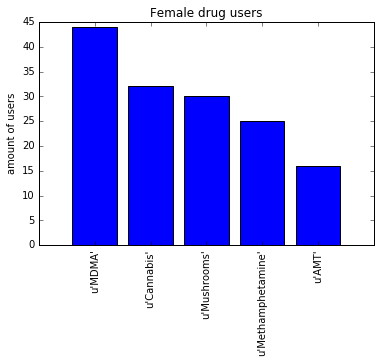

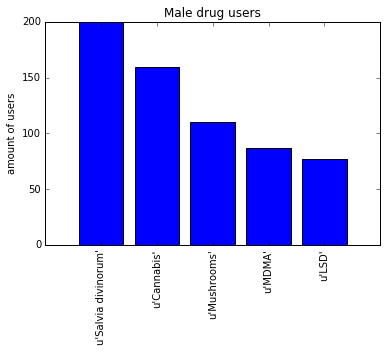

In [184]:
#display the results as bar plots

%matplotlib inline
import matplotlib.pyplot as plt


#the first dict is female drug users
female_drugs = gender_count_tuple[0]
#clean the empty string values '' from the dict
cleaned_female_drugs = {i:female_drugs[i] for i in female_drugs if i!=''}
#the second dict is male drug users
male_drugs = gender_count_tuple[1]
#clean the empty string values from the dict
cleaned_male_drugs = {i:male_drugs[i] for i in male_drugs if i!=''}

#get the top 5 used drugs from male and female users useing the cleaned dicts
top_female_drugs = Counter(cleaned_female_drugs).most_common(5)
top_male_drugs = Counter(cleaned_male_drugs).most_common(5)

#display the results as a bar chart
#female drug users plotted onto a graph
plt.bar(range(len(top_female_drugs)), [x[1] for x in top_female_drugs], align="center")
plt.xticks(range(len(top_female_drugs)), [x[0] for x in top_female_drugs], rotation='vertical')
#label the axis
plt.ylabel('amount of users')
plt.title('Female drug users')

plt.show()

#male drug users plotted onto a drug
plt.bar(range(len(top_male_drugs)), [y[1] for y in top_male_drugs], align="center")
plt.xticks(range(len(top_male_drugs)), [y[0] for y in top_male_drugs], rotation='vertical')
#label the axis 
plt.ylabel('amount of users')
plt.title('Male drug users')

plt.show()

In [185]:
from wordcloud import WordCloud

In [186]:
#function to make clouds 
def make_cloud(text):
    wordcloud = WordCloud(max_font_size=40, relative_scaling=.5).generate(text)  # Note that this is different from the code on the web! You must specify the font path
    # Open a plot of the generated image.
    plt.imshow(wordcloud)
    plt.axis("off")
    return plt.show()

In [187]:
#first we want  to get the text associated with LSD
for i in test_dict.values():
    if i.keys

{'23996': {"u'Nutmeg'": u' Female'}, '23990': {"u'MDMA'": u' Male'}, '23991': {"u'Pharms - Fluoxetine', u'Pharms - Paroxetine', u'Pharms - Citalopram'": u' Female'}, '103942': {"u'Tabernanthe iboga'": u' Male'}, '16073': {"u'5-MeO-DMT'": u' Male'}, '22466': {"u'Cannabis', u'Morning Glory'": u' Not Specified'}, '16071': {"u'Salvia divinorum'": u' Female'}, '16070': {"u'Mushrooms'": u' Male'}, '16076': {"u'Cannabis', u'Mushrooms - P. cubensis'": u' Male'}, '16074': {"u'Dimenhydrinate'": u' Male'}, '101767': {'': u' Male'}, '13736': {"u'Cannabis', u'AMT'": u' Male'}, '11541': {"u'Alcohol - Hard', u'Caffeine'": u' Not Specified'}, '24653': {'': u' Male'}, '17527': {"u'Cannabis', u'Tryptophan - 5-HTP'": u' Male'}, '23442': {"u'Alcohol'": u' Male'}, '21392': {"u'Mushrooms'": u' Female'}, '22661': {"u'2C-T-4'": u' Male'}, '18184': {"u'Amphetamines'": u' Male'}, '26371': {"u'Mimosa tenuiflora', u'Harmala Alkaloids', u'PCP'": u' Male'}, '101768': {"u'MDA'": u' Male'}, '109059': {"u'6-APB', u'AM